In [1]:
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
%pylab inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn as tflearn
from tensorflow.contrib import layers as tflayers
from lstm_model import lstm_model, convert_data

data = pd.read_csv('text_emotion.csv')
names = data.columns.values.tolist()

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Preprocessing, select 5 most frequen labels and map them to float number
#fro purpose of easy labeling for nn.
baseline = ['sadness', 'worry', 'happiness', 'love', 'neutral']
data = data[[(sentiment in baseline) for sentiment in data['sentiment']]]
data['sentiment'] = data['sentiment'].map({'sadness' : 1.0, 'worry' : 2.0,
                        'happiness' : 3.0, 'love' : 4.0, 'neutral' : 5.0})
train_data, test_data = train_test_split(data, test_size=0.2)

In [3]:
def draw_histogram(data):
    labels,values = zip(*Counter(data['sentiment']).items())
    indexes = np.arange(len(labels))
    width = 0.5
    plt.xticks(indexes + width * 0.5, labels, rotation = 'vertical')
    plt.bar(indexes, values, width)

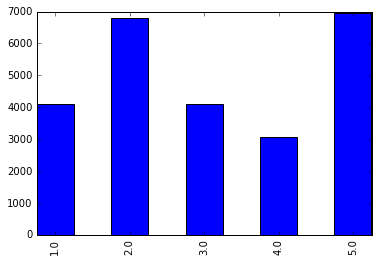

In [4]:
#distribution of train data
draw_histogram(train_data)

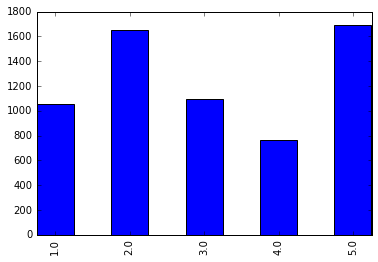

In [5]:
#distribution of test_data
draw_histogram(test_data)

In [6]:
#converting data to fit the shape appropriate for rnn which expects:
#tensor[B,T....] where B - batch size, T - Timesteps, and then goes features
#X_train_TF, X_test_TF - only tf-idf set features for classification
#TODO inrich set of features lately
vectorizer = TfidfVectorizer(stop_words = 'english')
X_train_TF = convert_data(pd.DataFrame(vectorizer.fit_transform(train_data['content']).todense()), 3)
X_test_TF = convert_data(pd.DataFrame(vectorizer.transform(test_data['content']).todense()), 3)
Y_train = train_data['sentiment']
Y_test = test_data['sentiment']
#batched_train_X_TF = tf.train.batch(tensors = X_train_TF.tolist(), 
#                                    batch_size=100,name="train_batch")
#batched_test_X_TF = tf.train.batch(tensors = X_test_TF.tolist(), 
#                                   batch_size=100,name="trest_batch")

In [7]:
print(X_train_TF.shape,'\n')
print(X_test_TF.shape, '\n')

(25047, 3, 33978) 

(6260, 3, 33978) 



In [8]:
timesteps = 3
rnn_layers = [{'num_units':5}]
dense_layers= None
training_steps = 33978
batch_size = 100

classificator = tf.contrib.learn.Estimator(model_fn=lstm_model(timesteps,rnn_layers,dense_layers))

In [9]:
validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(X_train_TF, Y_train, 
                                                    every_n_steps=1000, early_stopping_rounds = 1000)

In [10]:
classificator.fit(X_train_TF, Y_train, monitors = [validation_monitor],
                  batch_size = batch_size, steps = training_steps)

InvalidArgumentError: You must feed a value for placeholder tensor 'input' with dtype float
	 [[Node: input = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op 'input', defined at:
  File "/home/george/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/george/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/george/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/george/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/george/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/home/george/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/george/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/george/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/george/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/george/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/george/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/george/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/george/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/george/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/george/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/george/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2831, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/george/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-f26a2596fab8>", line 2, in <module>
    batch_size = batch_size, steps = training_steps)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 219, in fit
    max_steps=max_steps)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 477, in _train_model
    features, targets = input_fn()
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/learn_io/data_feeder.py", line 326, in input_builder
    name='input')
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1212, in placeholder
    name=name)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1530, in _placeholder
    name=name)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2317, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/george/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1239, in __init__
    self._traceback = _extract_stack()
